<a href="https://colab.research.google.com/github/AbinReji07/Telco-Customer-Churn-Prediction-using-Machine-Learning/blob/main/Telco_Customer_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd
df=pd.read_csv("/content/Telco_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [5]:
df.drop(['customerID'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

In [7]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [8]:
df.shape

(7043, 20)

In [9]:
x=df.iloc[:,:-1]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [10]:
y=df.iloc[:,-1]
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [11]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [12]:
from imblearn.over_sampling import SMOTE
over_sampling=SMOTE(random_state=1)
x_os,y_os=over_sampling.fit_resample(x,y)

In [13]:
y_os.value_counts()

,count
Churn,
0,5174
1,5174


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_os)
x_scaled

array([[-0.85974395, -0.38915417,  1.29539717, ...,  0.45124765,
        -1.33134984, -0.39218976],
       [ 1.163137  , -0.38915417, -0.77196401, ...,  1.45630808,
        -0.38124198, -0.9409304 ],
       [ 1.163137  , -0.38915417, -0.77196401, ...,  1.45630808,
        -0.48992591, -1.63226967],
       ...,
       [-0.85974395, -0.38915417, -0.77196401, ...,  0.45124765,
         1.28877761,  1.32269077],
       [-0.85974395, -0.38915417, -0.77196401, ..., -1.55887319,
         0.16702388, -1.21345222],
       [-0.85974395, -0.38915417, -0.77196401, ...,  0.45124765,
        -0.82159002,  0.26006692]])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_os,test_size=0.3,random_state=1)

In [16]:
x_train

array([[ 1.163137  , -0.38915417, -0.77196401, ...,  0.45124765,
         0.56473248, -0.80414135],
       [-0.85974395, -0.38915417, -0.77196401, ...,  0.45124765,
        -0.59657149,  0.52149774],
       [ 1.163137  , -0.38915417,  1.29539717, ..., -0.55381277,
         0.60918411, -0.78090305],
       ...,
       [ 1.163137  ,  2.56967564, -0.77196401, ...,  0.45124765,
         1.14559186,  1.64485803],
       [ 1.163137  , -0.38915417, -0.77196401, ...,  1.45630808,
        -1.67843721, -1.52980992],
       [ 1.163137  , -0.38915417, -0.77196401, ...,  1.45630808,
        -0.47064327, -1.57311765]])

In [17]:
x_test

array([[-0.85974395, -0.38915417, -0.77196401, ..., -0.55381277,
        -0.54158342, -1.66501454],
       [ 1.163137  , -0.38915417, -0.77196401, ...,  1.45630808,
         0.44791119,  0.23577234],
       [ 1.163137  , -0.38915417, -0.77196401, ...,  0.45124765,
         0.43038152, -0.1756511 ],
       ...,
       [-0.85974395,  2.56967564,  1.29539717, ...,  0.45124765,
         0.90192952, -0.71118817],
       [-0.85974395, -0.38915417, -0.77196401, ...,  0.45124765,
         0.23335109,  1.30579019],
       [ 1.163137  ,  2.56967564, -0.77196401, ...,  0.45124765,
        -0.46538437,  0.88327574]])

In [18]:
y_train

,Churn
7899,1
7640,1
119,0
4770,0
4220,0
...,...
2895,0
7813,1
905,1
5192,0


In [19]:
y_test

,Churn
7370,1
3903,0
2793,0
1988,1
2106,0
...,...
10124,1
1556,1
4106,1
8677,1


In [20]:
#algorithm

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.svm import SVC
svm=SVC()

In [22]:
from sklearn.metrics import classification_report

In [23]:
lst= [knn,lr,nb,dt,rf,svm]
for i in lst:
  print("**********",i,"**********")
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))

********** KNeighborsClassifier() **********
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1582
           1       0.73      0.85      0.79      1523

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105

********** LogisticRegression() **********
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1582
           1       0.77      0.83      0.80      1523

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105

********** GaussianNB() **********
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1582
           1       0.77      0.82      0.79      1523

    accuracy                           0.79      3105
   ma

In [28]:
from sklearn.model_selection import GridSearchCV
p={ "n_estimators": [5,10,20,30,40,50,70],"criterion": ["gini", "entropy"],  "max_depth": [None, 5, 10, 20],"max_features": ["sqrt", "log2"]}
gr=GridSearchCV(rf,p,cv=10,scoring="accuracy",)
gr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 20, 30, 40, 50, 70]},
             scoring='accuracy')

In [29]:
print(gr.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 70}


In [30]:
rf1=RandomForestClassifier(n_estimators=70,criterion="entropy",max_depth=20,max_features="log2")
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=70)

In [31]:
y_pred1=rf1.predict(x_test)

In [32]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1582
           1       0.83      0.86      0.84      1523

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [33]:
from sklearn.metrics import accuracy_score,  confusion_matrix

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

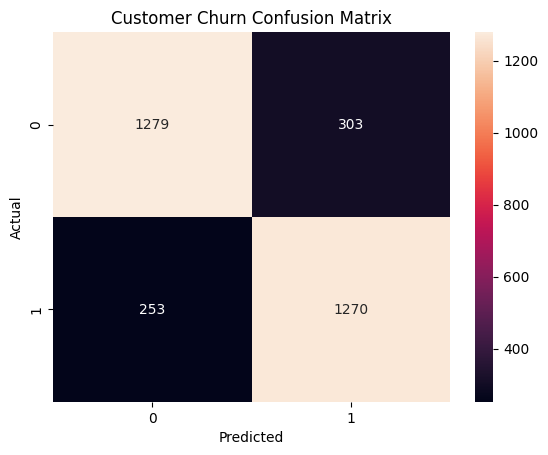

In [35]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Customer Churn Confusion Matrix")
plt.show()

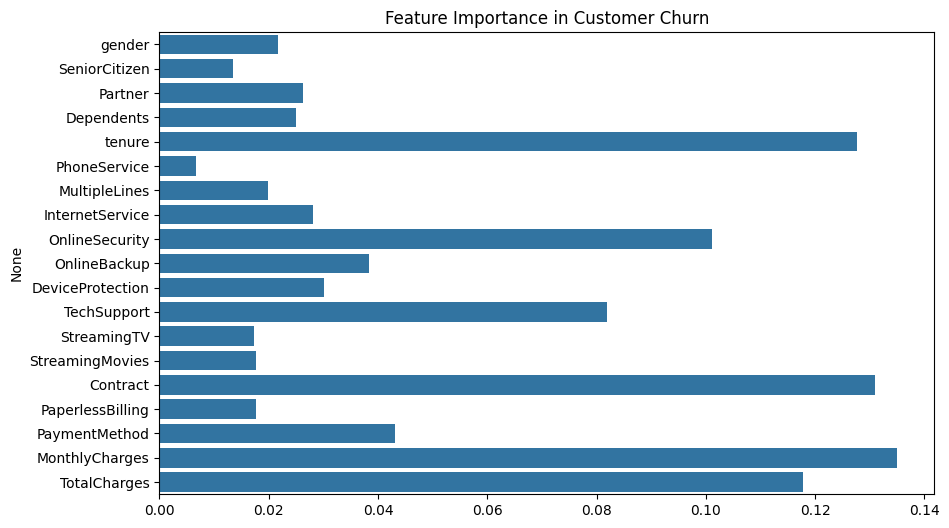

In [36]:
importance = rf.feature_importances_
features = x.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance in Customer Churn")
plt.show()


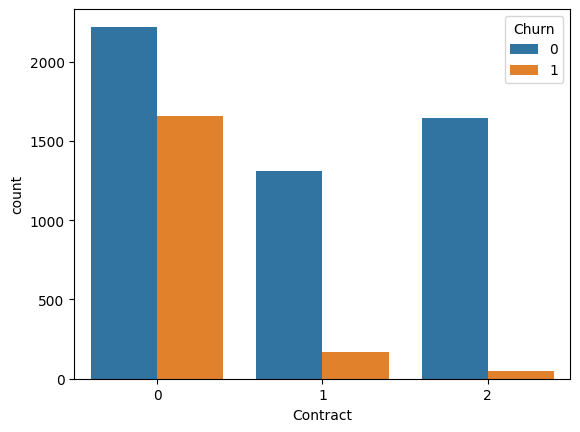

In [37]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.show()


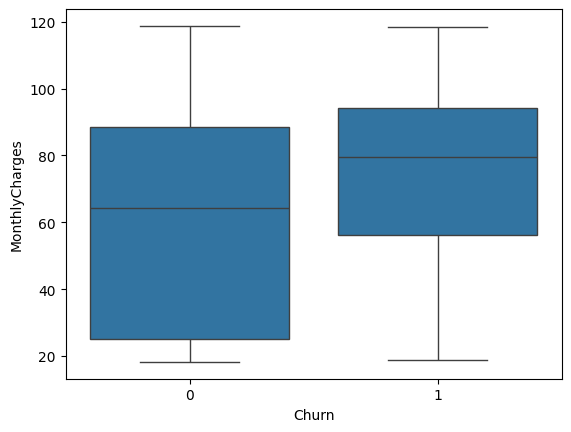

In [38]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()
